<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/keris_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%AC%ED%99%94_%EC%8B%9C%EA%B0%81%ED%99%94%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_%EB%84%98%ED%8C%8C%EC%9D%B4%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. 라이브러리 불러오기

In [ ]:
!pip install koreanize-matplotlib -q

In [ ]:
# 데이터 분석을 위한 라이브러리 불러오기
import koreanize_matplotlib      # 그래프의 한글처리
import pandas as pd              # 데이터프레임 처리
import numpy as np               # 수치 계산 및 가상 데이터 생성
import matplotlib.pyplot as plt  # 기본 시각화
import seaborn as sns            # 통계 기반 시각화

###2. 데이터의 생성

In [ ]:
# 난수 결과를 동일하게 하기 위해 시드 고정
np.random.seed(42)

# 데이터 개수 설정
n = 100

#  데이터 생성
data = {
    "학생ID": np.arange(1, n + 1),  # 1부터 n까지 학생 ID 생성
    "성별": np.random.choice(["남", "여"], n),  # 성별 무작위 선택
    "학년": np.random.choice([1, 2, 3], n),     # 학년 무작위 선택
    "수학점수": np.random.normal(70, 10, n).astype(int),  # 평균 70점,표준편차 10, 수학 점수
    "과학점수": np.random.normal(75, 12, n).astype(int),  # 평균 75점, 표준편차,12 과학 점수
    "공부시간": np.random.normal(2.5, 1, n),     # 하루 평균 공부시간
    "공부장소": np.random.choice(["독서실", "카페","집"], n)  # 공부 장소 무작위 선택
}

# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터프레임 상위 5행 확인
df.head()

,학생ID,성별,학년,수학점수,과학점수,공부시간,공부장소
0,1,남,3,55,70,1.954962,카페
1,2,여,2,67,81,1.232618,카페
2,3,남,2,79,108,2.610300,카페
3,4,남,2,67,74,2.069975,독서실
4,5,남,2,62,74,3.730211,독서실


###3. pandas 데이터 다루기

In [ ]:
# 데이터프레임의 컬럼 정보와 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학생ID    100 non-null    int64  
 1   성별      100 non-null    object 
 2   학년      100 non-null    int64  
 3   수학점수    100 non-null    int64  
 4   과학점수    100 non-null    int64  
 5   공부시간    100 non-null    float64
 6   공부장소    100 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


In [ ]:
# 수치형 데이터의 기초 통계량 확인
df.describe()

,학생ID,학년,수학점수,과학점수,공부시간
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2.040000,69.780000,74.380000,2.420050
std,29.011492,0.863631,10.271644,11.509136,1.049108
min,1.000000,1.000000,50.000000,47.000000,-0.064342
25%,25.750000,1.000000,62.000000,66.750000,1.670828
50%,50.500000,2.000000,69.000000,73.000000,2.392698
75%,75.250000,3.000000,77.250000,81.000000,3.028329
max,100.000000,3.000000,100.000000,108.000000,5.753985


In [ ]:
# 수학 점수 컬럼을 시리즈로 추출
math_series = df["수학점수"]
type(math_series)


pandas.core.series.Series

In [ ]:
# 수학 점수의 평균
math_series.mean()

np.float64(69.78)

In [ ]:
#수학 점수의 최댓값
math_series.max()

100

In [ ]:
# 조건에 맞는 데이터 선택
high_score = df[df["수학점수"] >= 90]
high_score

KeyError: '수학점수'

In [ ]:
# 조건에 맞는 값 변경
df.loc[df["수학점수"] < 50, "수학점수"] = 50

# 변경 후 데이터 확인
df

3. 데이터 통합 (merge)

In [ ]:
# 학생 동아리 정보를 담은 데이터프레임 생성
club_df = pd.DataFrame({
    "학생ID": np.arange(1, n + 1),  # 학생 ID
    "동아리": np.random.choice(["과학", "수학", "없음"], n)  # 동아리 종류
})

# 학생ID를 기준으로 두 데이터프레임 병합
merged_df = pd.merge(df, club_df, on="학생ID", how="inner")

# 병합 결과 확인
merged_df.head()


,학생ID,성별,학년,수학점수,과학점수,공부시간,공부장소,동아리
0,1,남,3,55,70,1.954962,카페,과학
1,2,여,2,67,81,1.232618,카페,과학
2,3,남,2,79,108,2.610300,카페,없음
3,4,남,2,67,74,2.069975,독서실,없음
4,5,남,2,62,74,3.730211,독서실,없음


In [ ]:
# 학년과 성별 기준으로 그룹화하여 평균 점수 계산
group_avg = df.groupby(["학년", "성별"])[["수학점수", "과학점수"]].mean()

# 결과 출력
group_avg

수학점수       과학점수
학년 성별                      
1  남   71.230769  73.846154
   여   67.363636  71.363636
2  남   72.285714  74.357143
   여   67.916667  76.250000
3  남   68.352941  72.647059
   여   71.863636  78.045455

4. 데이터 시각화 실습

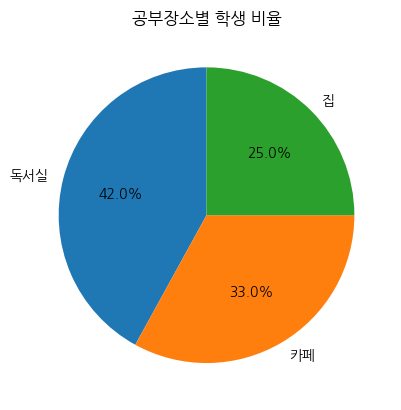

In [ ]:
#문제1. 구성 비교 — 원형 그래프 (공부장소 비율)
place_counts = df["공부장소"].value_counts()

plt.figure()
plt.pie(place_counts, labels=place_counts.index, autopct="%.1f%%", startangle=90)
plt.title("공부장소별 학생 비율")
plt.show()

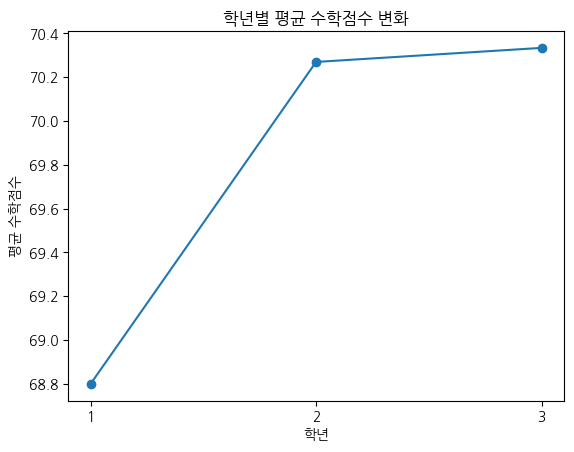

In [ ]:
# 문제 2. 추이 비교 — 선그래프 (학년별 평균 수학점수)
avg_math = df.groupby("학년")["수학점수"].mean()

plt.figure()
plt.plot(avg_math.index, avg_math.values, marker="o")
plt.xticks([1, 2, 3])
plt.xlabel("학년")
plt.ylabel("평균 수학점수")
plt.title("학년별 평균 수학점수 변화")
plt.show()

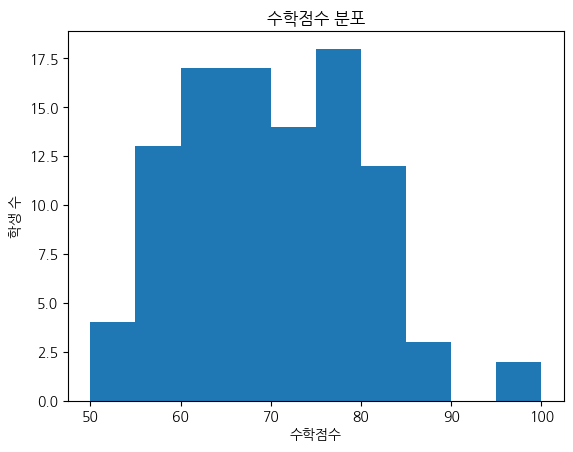

In [ ]:
# 문제 3. 분포 비교 — 히스토그램 (수학점수 분포)
plt.hist(df["수학점수"], bins=10)
plt.xlabel("수학점수")
plt.ylabel("학생 수")
plt.title("수학점수 분포")
plt.show()

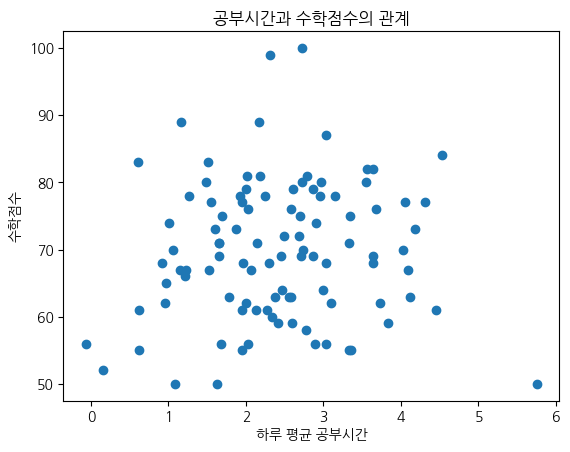

In [ ]:
# 문제 4. 연관관계 비교 — 산점도 (공부시간 vs 수학점수)
plt.figure()
plt.scatter(df["공부시간"], df["수학점수"])
plt.xlabel("하루 평균 공부시간")
plt.ylabel("수학점수")
plt.title("공부시간과 수학점수의 관계")
plt.show()

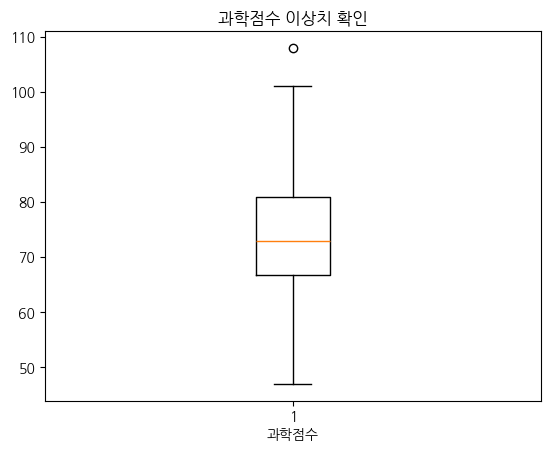

In [ ]:
# 문제 5. 이상치 발견 — 박스플롯 (과학점수)
plt.figure()
plt.boxplot(df["과학점수"])
plt.xlabel("과학점수")
plt.title("과학점수 이상치 확인")
plt.show()

In [ ]:
# 1사분위수(Q1)와 3사분위수(Q3) 계산
Q1 = df["과학점수"].quantile(0.25)
Q3 = df["과학점수"].quantile(0.75)

# 사분위 범위(IQR) 계산
IQR = Q3 - Q1

# IQR 기준을 벗어난 이상치 추출
outliers = df[
    (df["과학점수"] < Q1 - 1.5 * IQR) |
    (df["과학점수"] > Q3 + 1.5 * IQR)
]

# 이상치 데이터 확인
outliers[["학생ID", "과학점수"]]


,학생ID,과학점수
2,3,108


##심화문제
온도 센서가 일정 시간 동안 측정한 기온 데이터 10개를 리스트로 생성하시오.
이때 센서 오류로 보이는 비정상적으로 높은 값 또는 낮은 값을 반드시 포함시키고,
해당 데이터를 판다스 데이터프레임으로 변환한 뒤 다음을 계산하시오.
평균 기온, 중위값,각 기온 값의 빈도수

In [ ]:
import pandas as pd

# 1. 센서 기온 데이터 생성 (이상치 포함)
temperature = [22.5, 23.0, 22.8, 23.1, 22.9, 23.2, 22.7, 23.0, 45.0, -5.0]

# 2. 데이터프레임 생성
df = pd.DataFrame({"기온": temperature})

# 3. 평균 기온 계산
mean_temp = df["기온"].mean()

# 4. 중위값 계산
median_temp = df["기온"].median()

# 5. 기온 값별 빈도수 계산
freq_temp = df["기온"].value_counts()

# 6. 결과 출력
print("평균 기온:", mean_temp)
print("중위값:", median_temp)
print("기온 빈도수:",freq_temp)

평균 기온: 22.32
중위값: 22.95
기온 빈도수: 기온
 23.0    2
 22.5    1
 22.8    1
 23.1    1
 22.9    1
 23.2    1
 22.7    1
 45.0    1
-5.0     1
Name: count, dtype: int64


문제2) 온도 센서 데이터의 분포를 박스플롯으로 시각화하여 이상치를 확인한 뒤, 이상치 값을 중위값으로 대체하고 대체 전·후 데이터를 비교하여 출력하시오..

원본 데이터
    온도
0   21
1   22
2   22
3   23
4   21
5   24
6   23
7   22
8   21
9   23
10  22
11  24
12  23
13  22
14  21
15  25
16  26
17  27
18  19
19  18

기초 통계량
              온도
count  20.000000
mean   22.450000
std     2.139233
min    18.000000
25%    21.000000
50%    22.000000
75%    23.250000
max    27.000000

중위값: 22.0


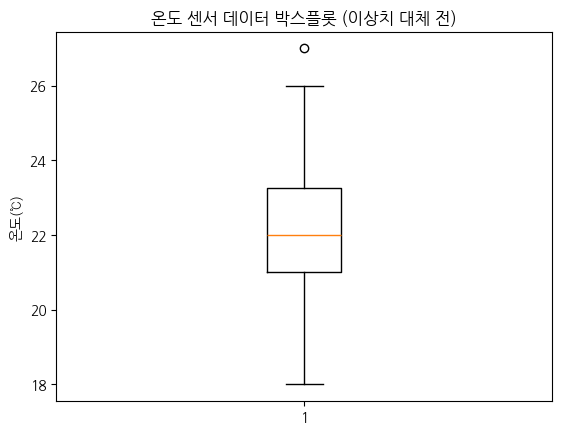


이상치 기준
하한값: 17.625
상한값: 26.625

이상치 데이터
    온도
17  27

이상치 대체 후 데이터
    온도
0   21
1   22
2   22
3   23
4   21
5   24
6   23
7   22
8   21
9   23
10  22
11  24
12  23
13  22
14  21
15  25
16  26
17  22
18  19
19  18


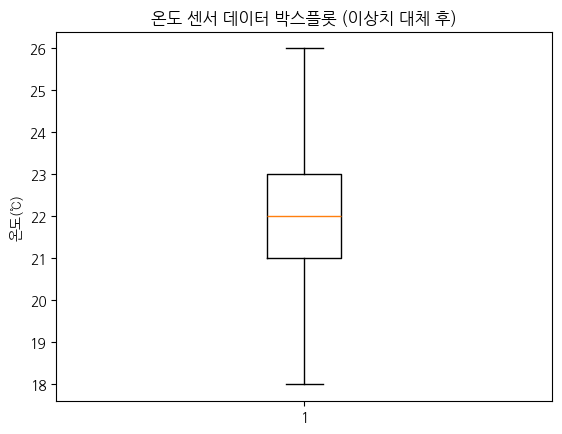

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. 온도 센서 데이터 생성 (20개, 완만한 이상치 포함)
# =========================
temperature = [
    21, 22, 22, 23, 21, 24, 23, 22, 21, 23,
    22, 24, 23, 22, 21, 25, 26, 27, 19, 18
]

# 데이터프레임 생성
df = pd.DataFrame({"온도": temperature})

# =========================
# 2. 데이터 확인
# =========================
print("원본 데이터")
print(df)

# =========================
# 3. 기초 통계량 계산
# =========================
print("\n기초 통계량")
print(df.describe())

median_value = df["온도"].median()
print("\n중위값:", median_value)

# =========================
# 4. 박스플롯으로 이상치 시각화 (대체 전)
# =========================
plt.boxplot(df["온도"])
plt.title("온도 센서 데이터 박스플롯 (이상치 대체 전)")
plt.ylabel("온도(℃)")
plt.show()

# =========================
# 5. 사분위수를 이용한 이상치 기준 설정
# =========================
Q1 = df["온도"].quantile(0.25)
Q3 = df["온도"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\n이상치 기준")
print("하한값:", lower_bound)
print("상한값:", upper_bound)

# =========================
# 6. 이상치 판별
# =========================
outlier_condition = (df["온도"] < lower_bound) | (df["온도"] > upper_bound)

print("\n이상치 데이터")
print(df[outlier_condition])

# =========================
# 7. 이상치를 중위값으로 대체
# =========================
df.loc[outlier_condition, "온도"] = median_value

# =========================
# 8. 이상치 대체 후 데이터 확인
# =========================
print("\n이상치 대체 후 데이터")
print(df)

# =========================
# 9. 박스플롯으로 재확인 (대체 후)
# =========================
plt.boxplot(df["온도"])
plt.title("온도 센서 데이터 박스플롯 (이상치 대체 후)")
plt.ylabel("온도(℃)")
plt.show()
